In [3]:
import csv
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
import sys, os
sys.path.append('../../')

from lib.utils import trace_processing
from lib.visualization import data_visualization
from lib.analysis import trace_statistics
from lib.analysis import trace_classification

In [6]:
plots = set()
with open('traces/traces.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            plots.add((row[1], row[2]))

plots = list(plots)  

X_200 = None
X_100 = None
X_50 = None
X_25 = None
for row in plots:
    label = 0
    experiment = row[1]
    
    # Assign a label
    if row[1].find('gh') >= 0 or row[1].find('bh') >= 0:
        label = 1
    nodes, packets_node = trace_processing.process_cooja_traces(row[0], row[1])

    # Update 200 stats
    if X_200 is None:
        X_200 = trace_processing.feature_extraction(nodes, packets_node, label, experiment, 200)    
    else:
        X_200 = pd.concat([X_200, trace_processing.feature_extraction(nodes, packets_node, label, experiment, 200)])
    # Update 100 stats
    if X_100 is None:
        X_100 = trace_processing.feature_extraction(nodes, packets_node, label, experiment, 100)    
    else:
        X_100 = pd.concat([X_100, trace_processing.feature_extraction(nodes, packets_node, label, experiment, 100)])
    # Update 50 stats
    if X_50 is None:
        X_50 = trace_processing.feature_extraction(nodes, packets_node, label, experiment, 50)    
    else:
        X_50 = pd.concat([X_50, trace_processing.feature_extraction(nodes, packets_node, label, experiment, 50)])
    # Update 25 stats
    if X_25 is None:
        X_25 = trace_processing.feature_extraction(nodes, packets_node, label, experiment, 25)    
    else:
        X_25 = pd.concat([X_25, trace_processing.feature_extraction(nodes, packets_node, label, experiment, 25)])

X_200 = (X_200).reset_index(drop=True)
X_100 = (X_100).reset_index(drop=True)
X_50 = (X_50).reset_index(drop=True)
X_25 = (X_25).reset_index(drop=True)
X_200.head(10)

,node,experiment,tr_time,pckt_count,mean,var,hop,min,max,loss,outliers,label
0,aaaa::212:7403:3:303:,grid9_1bh-3_2019-02-13_16:28_,24427.1,186,131.328495,17070.628211,1,38.4,937.0,14.0,7,1
1,aaaa::212:7405:5:505:,rnd2_1bh-8_2019-02-15_17:28_,16847.0,185,91.064865,1589.501748,2,56.9,304.0,15.0,11,1
2,aaaa::212:7404:4:404:,rnd2_1bh-8_2019-02-15_17:28_,19678.6,196,100.401020,3307.615794,2,56.0,413.0,4.0,11,1
3,aaaa::212:7403:3:303:,rnd2_1bh-8_2019-02-15_17:28_,9851.4,197,50.007107,289.787398,1,25.3,120.0,3.0,16,1
4,aaaa::212:7408:8:808:,rnd2_1bh-8_2019-02-15_17:28_,10451.9,193,54.154922,292.584989,1,34.9,159.0,7.0,9,1
5,aaaa::212:740a:a:a0a:,rnd2_1bh-8_2019-02-15_17:28_,22002.3,184,119.577717,936.853435,2,78.4,288.0,16.0,7,1
6,aaaa::212:7402:2:202:,rnd2_1bh-8_2019-02-15_17:28_,10623.3,191,55.619372,508.624833,1,26.6,179.0,9.0,6,1
7,aaaa::212:7409:9:909:,rnd2_1bh-8_2019-02-15_17:28_,31271.7,196,159.549490,3159.206718,3,97.2,481.0,4.0,10,1
8,aaaa::212:7406:6:606:,rnd2_1bh-8_2019-02-15_17:28_,8866.3,196,45.236224,204.230630,1,25.0,129.0,4.0,8,1
9,aaaa::212:7407:7:707:,rnd2_1bh-8_2019-02-15_17:28_,18498.0,198,93.424242,417.169054,2,67.2,198.0,2.0,10,1


In [9]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_200 = mm_scaler.fit_transform(X_200.drop(['node','label','experiment'], axis=1))
X_train_200 = pd.DataFrame(X_train_200, columns=['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers'])
X_train_200 = X_train_200.join(X_200.drop(['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers', 'experiment', 'node'], axis=1))


X_train_100 = mm_scaler.fit_transform(X_100.drop(['node','label','experiment'], axis=1))
X_train_100 = pd.DataFrame(X_train_100, columns=['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers'])
X_train_100 = X_train_100.join(X_100.drop(['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers', 'experiment', 'node'], axis=1))

X_train_50 = mm_scaler.fit_transform(X_50.drop(['node','label','experiment'], axis=1))
X_train_50 = pd.DataFrame(X_train_50, columns=['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers'])
X_train_50 = X_train_50.join(X_50.drop(['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers', 'experiment', 'node'], axis=1))

X_train_25 = mm_scaler.fit_transform(X_25.drop(['node','label','experiment'], axis=1))
X_train_25 = pd.DataFrame(X_train_25, columns=['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers'])
X_train_25 = X_train_25.join(X_25.drop(['tr_time', 'pckt_count', 'mean', 'var', 'hop','min', 'max', 'loss', 'outliers', 'experiment', 'node'], axis=1))



/Users/lucamaiano/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/lucamaiano/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/lucamaiano/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/lucamaiano/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
trace_stats = {200: X_train_200, 100: X_train_100, 50: X_train_50, 25: X_train_25}

# Feature Selection

Select the set of features and labels that we use to fit the algorithm

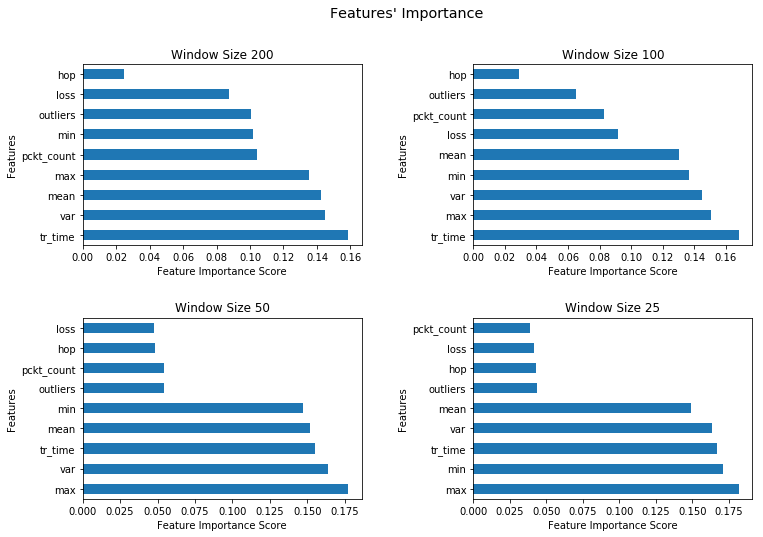

In [11]:
plots_analysis.random_forests_features_selection(trace_stats)

In [12]:
results = None            # Results from each classification algorithm
cv_results = None         # Cross validation results from each classification algorithm
net_results = None            # Results from each classification algorithm
cv_net_results = None         # Cross validation results from each classification algorithm

features_to_drop = ['label', 'loss', 'count', 'outliers']
net_features_to_drop = ['experiment', 'label']

In [12]:
plot_results = None            # Results from each classification algorithm
plot_cv_results = None         # Cross validation results from each classification algorithm
plot_net_results = None            # Results from each classification algorithm
plot_cv_net_results = None         # Cross validation results from each classification algorithm

# Random Forests Classifier

Let us experiment with random forests. First, let us select most relevant features.

In [14]:
results = pd.concat([results, 
                     trace_classification.random_forest_classification(trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [15]:
plot_results = pd.concat([plot_results, 
                     trace_classification.random_forest_classification(plot_trace_stats, features_to_drop)
                    ])
rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.random_forest_classification(rnd1_trace_stats, features_to_drop)
                    ])
rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.random_forest_classification(rnd2_trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [16]:
cv_results = pd.concat([cv_results, 
                     trace_classification.random_forest_cross_validation(trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [17]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.random_forest_cross_validation(plot_trace_stats, features_to_drop)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.random_forest_cross_validation(rnd1_trace_stats, features_to_drop)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.random_forest_cross_validation(rnd2_trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [18]:
net_results = pd.concat([net_results, 
                     trace_classification.random_forest_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [19]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.random_forest_classification(plot_network_stats, net_features_to_drop)
                    ])

rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.random_forest_classification(rnd1_network_stats, net_features_to_drop)
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.random_forest_classification(rnd2_network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [20]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.random_forest_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [21]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.random_forest_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.random_forest_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.random_forest_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


# K-Nearest Neighbor (KNN) Classification

Let us first observe the accuracies for different values of k

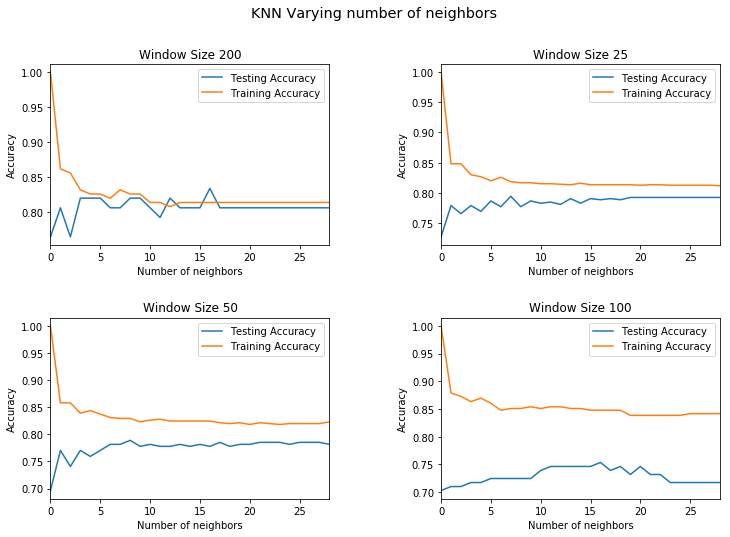

In [22]:
plots_analysis.knn_test_number_of_neighbors(trace_stats, 30)

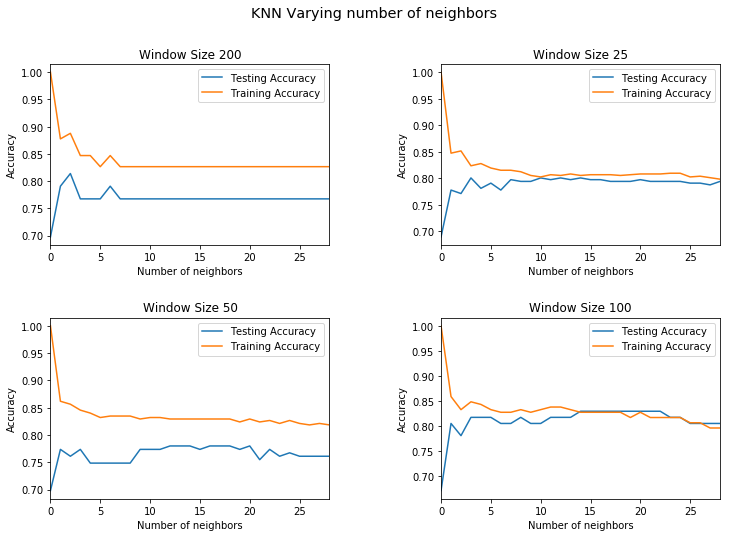

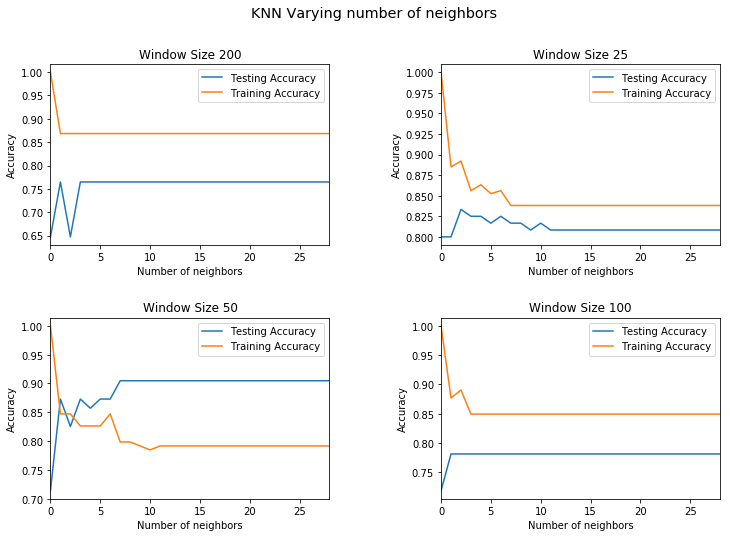

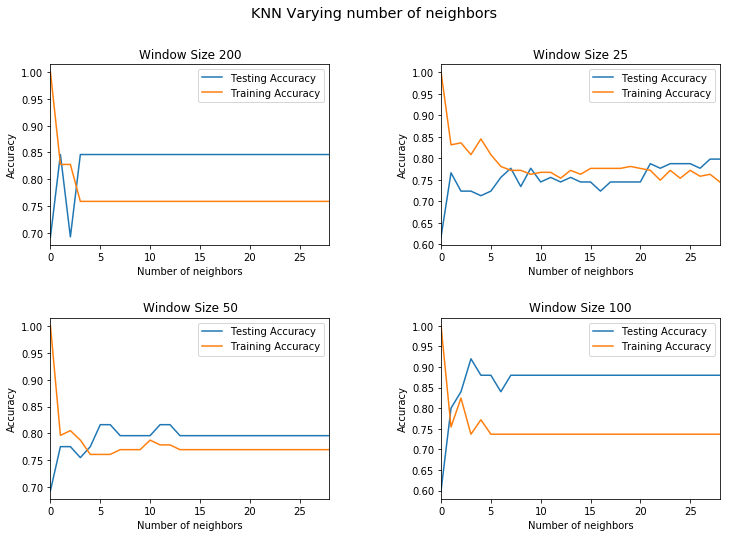

In [23]:
plots_analysis.knn_test_number_of_neighbors(plot_trace_stats, 30)
plots_analysis.knn_test_number_of_neighbors(rnd1_trace_stats, 30)
plots_analysis.knn_test_number_of_neighbors(rnd2_trace_stats, 30)

Let's build KNN classifier 

In [24]:
results = pd.concat([results, 
                     trace_classification.k_nearest_neighbor_classification(trace_stats, features_to_drop, n_neighbors=10)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [25]:
plot_results = pd.concat([plot_results, 
                     trace_classification.k_nearest_neighbor_classification(plot_trace_stats, features_to_drop, n_neighbors=15)
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd1_trace_stats, features_to_drop, n_neighbors=15)
                    ])

rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd2_trace_stats, features_to_drop, n_neighbors=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [26]:
cv_results = pd.concat([cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(trace_stats, features_to_drop, n_neighbors=30)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [27]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(plot_trace_stats, features_to_drop, n_neighbors=30)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd1_trace_stats, features_to_drop, n_neighbors=30)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd2_trace_stats, features_to_drop, n_neighbors=30)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [28]:
net_results = pd.concat([net_results, 
                     trace_classification.k_nearest_neighbor_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [29]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.k_nearest_neighbor_classification(plot_network_stats, net_features_to_drop)
                    ])

rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd1_network_stats, net_features_to_drop)
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd2_network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [30]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [31]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3, n_neighbors = 2)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


# Support Vector Machines (SVM) Classification

Let us experiment with another classifier

In [32]:
results = pd.concat([results, 
                     trace_classification.support_vector_machines_classification(trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [33]:
plot_results = pd.concat([plot_results, 
                     trace_classification.support_vector_machines_classification(plot_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.support_vector_machines_classification(rnd1_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.support_vector_machines_classification(rnd2_trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [34]:
cv_results = pd.concat([cv_results, 
                     trace_classification.support_vector_machines_cross_validation(trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [35]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(plot_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd1_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd2_trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [36]:
net_results = pd.concat([net_results, 
                     trace_classification.support_vector_machines_classification(network_stats, net_features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [37]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.support_vector_machines_classification(plot_network_stats, net_features_to_drop, kernel='rbf')
                    ])

'''rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.support_vector_machines_classification(rnd1_network_stats, net_features_to_drop, kernel='rbf')
                    ])'''

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.support_vector_machines_classification(rnd2_network_stats, net_features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [38]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])


Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [39]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

'''rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])'''

'''rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, \n                     trace_classification.support_vector_machines_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)\n                    ])'

# One Vs The Rest Classifier

SVM performs really well, but it is slow. Now we try to implement it in a most efficient way. The strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes

In [40]:
results = pd.concat([results, 
                     trace_classification.ensalble_svm_classification(trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [41]:
plot_results = pd.concat([plot_results, 
                     trace_classification.ensalble_svm_classification(plot_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.ensalble_svm_classification(rnd1_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.ensalble_svm_classification(rnd2_trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validate

In [42]:
cv_results = pd.concat([cv_results, 
                     trace_classification.ensalble_svm_cross_validation(trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [43]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(plot_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd1_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd2_trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [44]:
net_results = pd.concat([net_results, 
                     trace_classification.ensalble_svm_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [45]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.ensalble_svm_classification(plot_network_stats, net_features_to_drop)
                    ])

'''rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.ensalble_svm_classification(rnd1_network_stats, net_features_to_drop)
                    ])'''

'''rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.ensalble_svm_classification(rnd2_network_stats, net_features_to_drop)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_net_results = pd.concat([rnd2_net_results, \n                     trace_classification.ensalble_svm_classification(rnd2_network_stats, net_features_to_drop)\n                    ])'

Cross validation

In [46]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [47]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(plot_network_stats, net_features_to_drop)
                    ])

'''rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd1_network_stats, net_features_to_drop)
                    ])
'''

'''rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd2_network_stats, net_features_to_drop)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, \n                     trace_classification.ensalble_svm_cross_validation(rnd2_network_stats, net_features_to_drop)\n                    ])'

# Per Node Results

Results from each model

In [48]:
results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.833333,0.794118,0.598522,0.619048,0.099531,0.006751
1,Random Forest,25,0.788462,0.624084,0.550889,0.551429,0.195509,0.012085
2,Random Forest,50,0.774074,0.635248,0.551190,0.547764,0.104298,0.008389
3,Random Forest,100,0.724638,0.642806,0.551671,0.535929,0.073107,0.007177
4,KNN,200,0.819444,0.908451,0.535714,0.516279,0.001200,0.003820
5,KNN,25,0.786538,0.568061,0.514114,0.488257,0.001713,0.012485
6,KNN,50,0.777778,0.646484,0.541667,0.530217,0.002131,0.009428
7,KNN,100,0.724638,0.664662,0.528361,0.486285,0.001552,0.005220
8,SVM,200,0.805556,0.402778,0.500000,0.446154,0.004218,0.001214
9,SVM,25,0.790385,0.589286,0.516523,0.490283,0.041202,0.009485


In [49]:
plot_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.767442,0.640244,0.534848,0.515766,0.087632,0.006078
1,Random Forest,25,0.820261,0.774306,0.592887,0.608705,0.124818,0.009324
2,Random Forest,50,0.798742,0.799329,0.596999,0.607407,0.085050,0.007257
3,Random Forest,100,0.780488,0.620952,0.557466,0.560714,0.066993,0.006578
4,KNN,200,0.767442,0.383721,0.500000,0.434211,0.001044,0.005109
5,KNN,25,0.800654,0.703716,0.539389,0.525606,0.001517,0.008814
6,KNN,50,0.779874,0.789610,0.548499,0.529387,0.001077,0.004539
7,KNN,100,0.829268,0.911392,0.588235,0.601389,0.001216,0.004629
8,SVM,200,0.767442,0.383721,0.500000,0.434211,0.001716,0.000862
9,SVM,25,0.800654,0.715185,0.533510,0.514045,0.043968,0.003350


In [50]:
rnd1_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.764706,0.382353,0.500000,0.433333,0.058231,0.005897
1,Random Forest,25,0.841667,0.755391,0.669879,0.696445,0.072465,0.006289
2,Random Forest,50,0.920635,0.774138,0.732456,0.750988,0.056271,0.006205
3,Random Forest,100,0.718750,0.383333,0.460000,0.418182,0.062627,0.007286
4,KNN,200,0.764706,0.382353,0.500000,0.433333,0.001275,0.003540
5,KNN,25,0.808333,0.404167,0.500000,0.447005,0.001862,0.012510
6,KNN,50,0.904762,0.452381,0.500000,0.475000,0.001829,0.002770
7,KNN,100,0.781250,0.390625,0.500000,0.438596,0.000776,0.001956
8,SVM,200,0.764706,0.382353,0.500000,0.433333,0.000822,0.000513
9,SVM,25,0.808333,0.404167,0.500000,0.447005,0.002585,0.001117


In [51]:
rnd2_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.692308,0.409091,0.409091,0.409091,0.070872,0.007118
1,Random Forest,25,0.680851,0.505405,0.505848,0.505263,0.075758,0.008183
2,Random Forest,50,0.836735,0.763566,0.674359,0.701220,0.066020,0.006148
3,Random Forest,100,0.880000,0.726190,0.787879,0.750831,0.065052,0.008209
4,KNN,200,0.846154,0.423077,0.500000,0.458333,0.000671,0.001363
5,KNN,25,0.744681,0.463663,0.481725,0.464387,0.000883,0.003422
6,KNN,50,0.795918,0.397959,0.500000,0.443182,0.000773,0.002210
7,KNN,100,0.880000,0.440000,0.500000,0.468085,0.000729,0.002114
8,SVM,200,0.846154,0.423077,0.500000,0.458333,0.000870,0.000494
9,SVM,25,0.808511,0.404255,0.500000,0.447059,0.002440,0.000939


Here we plot the average results for each model computed with cross validation

In [52]:
cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.773138
1,Random Forest,25,0.767785
2,Random Forest,50,0.771496
3,Random Forest,100,0.767391
4,KNN,200,0.810904
5,KNN,25,0.793762
6,KNN,50,0.797138
7,KNN,100,0.797826
8,SVM,200,0.798316
9,SVM,25,0.794921


In [53]:
plot_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.788862
1,Random Forest,25,0.761873
2,Random Forest,50,0.778580
3,Random Forest,100,0.780858
4,KNN,200,0.808776
5,KNN,25,0.791266
6,KNN,50,0.797394
7,KNN,100,0.794991
8,SVM,200,0.801879
9,SVM,25,0.796148


In [54]:
rnd1_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.777576
1,Random Forest,25,0.763259
2,Random Forest,50,0.771866
3,Random Forest,100,0.770130
4,KNN,200,0.837576
5,KNN,25,0.829177
6,KNN,50,0.826205
7,KNN,100,0.829177
8,SVM,200,0.837576
9,SVM,25,0.829177


In [55]:
rnd2_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.686508
1,Random Forest,25,0.671142
2,Random Forest,50,0.722426
3,Random Forest,100,0.767990
4,KNN,200,0.788095
5,KNN,25,0.779599
6,KNN,50,0.777941
7,KNN,100,0.781324
8,SVM,200,0.788095
9,SVM,25,0.779599


# Network Results

Here we print the results from each model on the whole network

In [56]:
net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.666667,0.428571,0.375000,0.400000,0.096586,0.005460
1,Random Forest,25,0.652778,0.422504,0.441964,0.430199,0.062979,0.006038
2,Random Forest,50,0.611111,0.453846,0.433333,0.437500,0.058502,0.006533
3,Random Forest,100,0.944444,0.968750,0.833333,0.883871,0.058938,0.008317
4,KNN,200,0.777778,0.437500,0.437500,0.437500,0.001236,0.002629
5,KNN,25,0.777778,0.651515,0.566964,0.570790,0.000810,0.004791
6,KNN,50,0.750000,0.573892,0.583333,0.577575,0.000967,0.003201
7,KNN,100,0.833333,0.416667,0.500000,0.454545,0.013764,0.005147
8,SVM,200,0.888889,0.444444,0.500000,0.470588,0.001425,0.000636
9,SVM,25,0.777778,0.388889,0.500000,0.437500,0.001420,0.000957


In [57]:
plot_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,1.000000,1.000000,1.000000,1.000000,0.085786,0.005760
1,Random Forest,25,0.681818,0.405405,0.405405,0.405405,0.059225,0.005658
2,Random Forest,50,0.909091,0.725000,0.725000,0.725000,0.051575,0.007950
3,Random Forest,100,0.818182,0.694444,0.694444,0.694444,0.063739,0.005665
4,KNN,200,0.666667,0.500000,0.333333,0.400000,0.000940,0.001848
5,KNN,25,0.795455,0.416667,0.472973,0.443038,0.000766,0.003916
6,KNN,50,0.909091,0.454545,0.500000,0.476190,0.000830,0.002184
7,KNN,100,0.727273,0.400000,0.444444,0.421053,0.001838,0.002689
8,SVM,200,1.000000,1.000000,1.000000,1.000000,0.001407,0.001266
9,SVM,25,0.840909,0.420455,0.500000,0.456790,0.002106,0.008111


In [58]:
rnd1_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.666667,0.333333,0.500000,0.400000,0.051033,0.005687
1,Random Forest,25,0.882353,0.441176,0.500000,0.468750,0.053076,0.007045
2,Random Forest,50,0.888889,0.444444,0.500000,0.470588,0.054399,0.009722
3,Random Forest,100,0.200000,0.500000,0.100000,0.166667,0.055926,0.005509
4,KNN,200,0.666667,0.333333,0.500000,0.400000,0.001251,0.002875
5,KNN,25,0.823529,0.437500,0.466667,0.451613,0.000994,0.002031
6,KNN,50,0.888889,0.444444,0.500000,0.470588,0.000675,0.001196
7,KNN,100,0.600000,0.500000,0.300000,0.375000,0.000668,0.001004


In [59]:
rnd2_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,1.000000,1.000000,1.00,1.000000,0.047235,0.005527
1,Random Forest,25,0.750000,0.611111,0.65,0.621053,0.049993,0.005493
2,Random Forest,50,0.833333,0.750000,0.90,0.777778,0.049683,0.006106
3,Random Forest,100,0.666667,0.750000,0.75,0.666667,0.053948,0.005464
4,KNN,200,1.000000,1.000000,1.00,1.000000,0.000676,0.001124
5,KNN,25,0.833333,0.416667,0.50,0.454545,0.000896,0.001586
6,KNN,50,0.833333,0.416667,0.50,0.454545,0.001442,0.001494
7,KNN,100,0.666667,0.333333,0.50,0.400000,0.001319,0.002107
8,SVM,200,1.000000,1.000000,1.00,1.000000,0.001621,0.001486
9,SVM,25,0.833333,0.416667,0.50,0.454545,0.001464,0.001473


Here we plot the average results for each model computed with cross validation

In [60]:
cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.761616
1,Random Forest,25,0.708409
2,Random Forest,50,0.766787
3,Random Forest,100,0.786341
4,KNN,200,0.802357
5,KNN,25,0.766956
6,KNN,50,0.808677
7,KNN,100,0.801337
8,SVM,200,0.835690
9,SVM,25,0.833368


In [61]:
plot_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.833333
1,Random Forest,25,0.743056
2,Random Forest,50,0.819444
3,Random Forest,100,0.694444
4,KNN,200,0.833333
5,KNN,25,0.812500
6,KNN,50,0.819444
7,KNN,100,0.777778
8,SVM,200,0.833333
9,SVM,25,0.833333


In [62]:
rnd1_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.722222
1,Random Forest,25,0.821637
2,Random Forest,50,0.859259
3,Random Forest,100,0.800000
4,KNN,200,0.888889
5,KNN,25,0.821637
6,KNN,50,0.829630
7,KNN,100,0.866667


In [63]:
rnd2_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.888889
1,Random Forest,25,0.706349
2,Random Forest,50,0.666667
3,Random Forest,100,0.666667
4,KNN,200,0.888889
5,KNN,25,0.801587
6,KNN,50,0.750000
7,KNN,100,0.833333
